In [1]:
# 경고(warning) 비표시 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

In [4]:
df = pd.read_csv('Data/Mall_Customers.csv')

In [5]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## 기초 통계량 확인

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Distplot of Age')

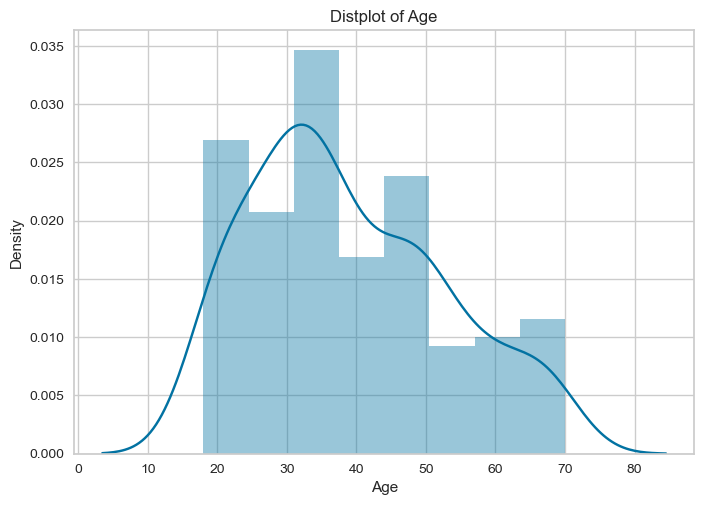

In [8]:
sns.distplot(df['Age'])
plt.title('Distplot of Age')

Text(0.5, 1.0, 'Distplot of Annual Income (k$)')

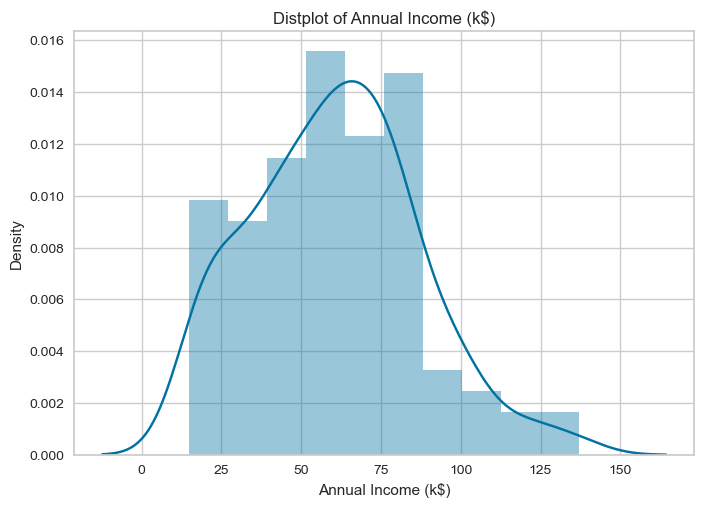

In [9]:
sns.distplot(df['Annual Income (k$)'])
plt.title('Distplot of Annual Income (k$)')

Text(0.5, 1.0, 'Distplot of Spending Score (1-100)')

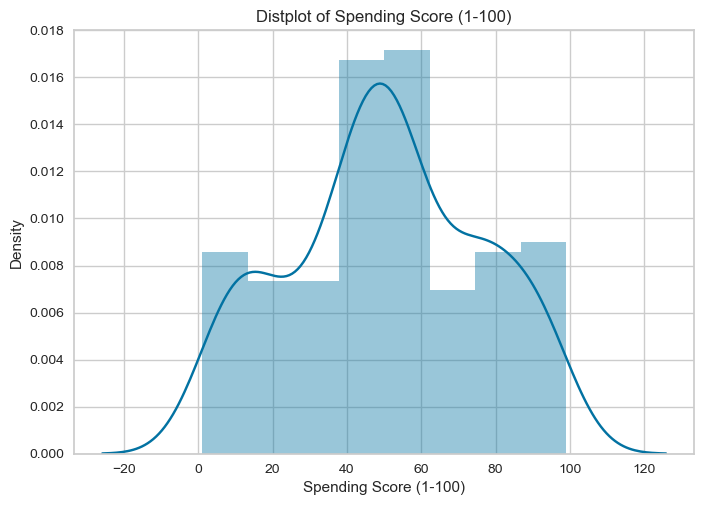

In [10]:
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distplot of Spending Score (1-100)')

In [14]:
# 성별 인원수 계산

df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [15]:
df.groupby('Gender').count()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,112,112,112,112
Male,88,88,88,88


<Axes: xlabel='count', ylabel='Gender'>

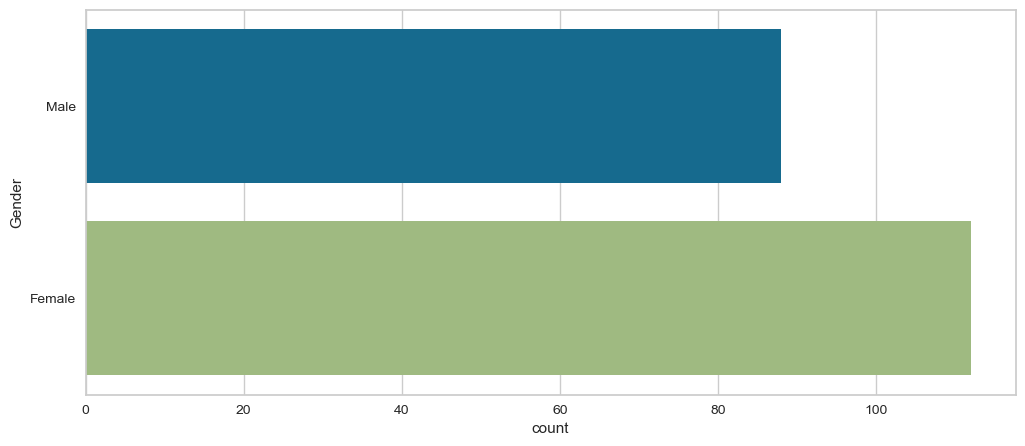

In [16]:
# 성별 인원수  Graph ( countplot)

plt.figure(1, figsize = (12,5))

sns.countplot(y = 'Gender' , data = df )

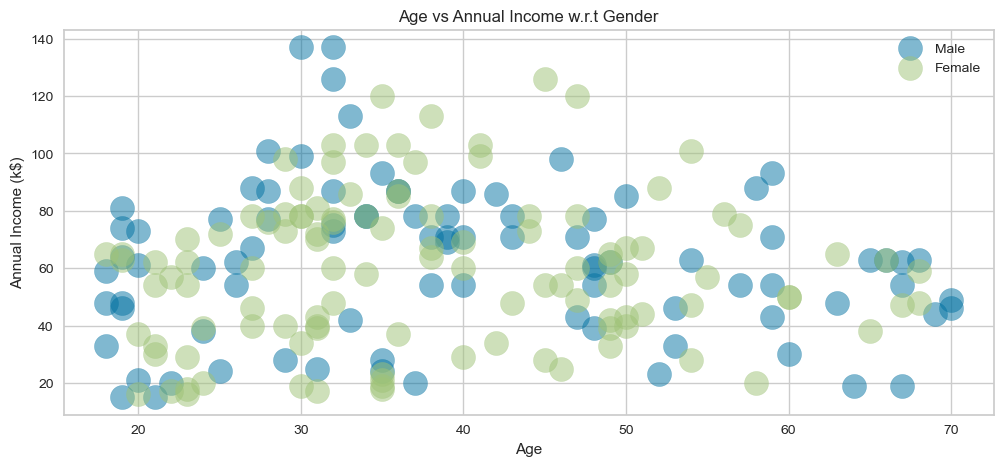

In [21]:
# 성별 나이와 연소득 분포(scatter)

plt.figure(1, figsize = (12,5))
for gender in ['Male', 'Female'] :
    plt.scatter(x = 'Age', y = 'Annual Income (k$)',
                data = df[df['Gender'] == gender ],
                s = 300, alpha = 0.5, label = gender )
    
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title( 'Age vs Annual Income w.r.t Gender' )
plt.legend()

In [22]:
# 성별로 나이와 연소득의 평균

df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


In [24]:
df.groupby('Gender')[['Age','Annual Income (k$)']].mean()

,Age,Annual Income (k$)
Gender,,
Female,38.098214,59.250000
Male,39.806818,62.227273


Text(25.972222222222214, 0.5, 'Gender')

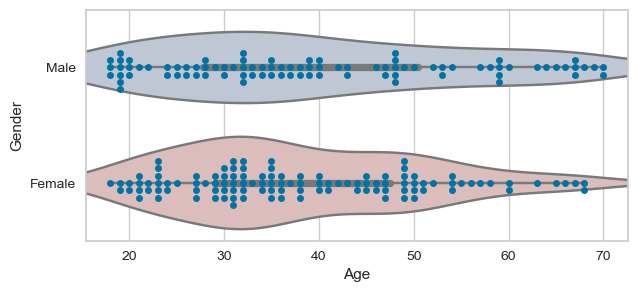

In [28]:
# 성별 나이문포(violin plot), swarmplot

plt.figure(1, figsize = (7,3))
sns.violinplot(x = 'Age', y = 'Gender', data = df, palette = 'vlag') 
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.swarmplot(x = 'Age', y = 'Gender', data = df)
plt.ylabel('Gender')

Text(25.972222222222214, 0.5, 'Gender')

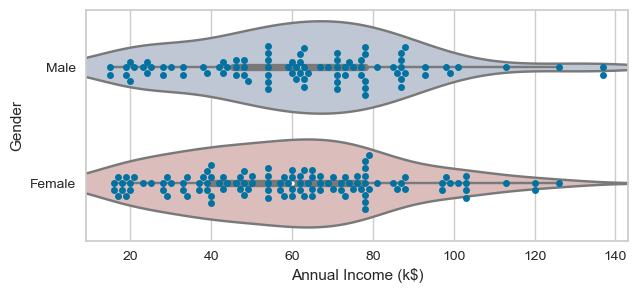

In [29]:
# 성별 연수득 문포(violin plot), swarmplot

plt.figure(1, figsize = (7,3))
sns.violinplot(x = 'Annual Income (k$)', y = 'Gender', data = df, palette = 'vlag') 
# https://seaborn.pydata.org/tutorial/color_palettes.html
sns.swarmplot(x = 'Annual Income (k$)', y = 'Gender', data = df)
plt.ylabel('Gender')

Text(25.972222222222214, 0.5, 'Gender')

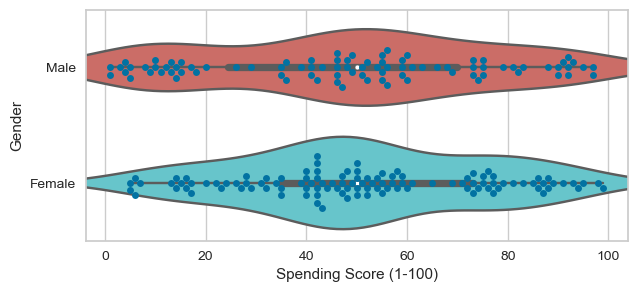

In [33]:
# 성별 연수득 문포(violin plot), swarmplot

plt.figure(1, figsize = (7,3))
sns.violinplot(x = 'Spending Score (1-100)', y = 'Gender', data = df, palette = 'hls') 
sns.swarmplot(x = 'Spending Score (1-100)', y = 'Gender', data = df)
plt.ylabel('Gender')

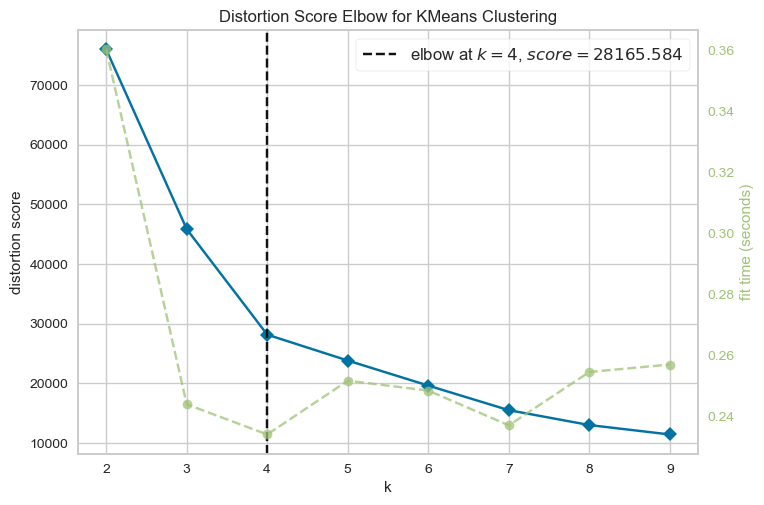

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# KMeans elbow ( 나이, 쇼핑점수)

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

data = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values

visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(data)
visualizer.show()

In [35]:
# 모델생성과 학습(군집번호 label1 에 저장)

a = KMeans(n_clusters = 4) # 그룹 4개로 지정 클러스터 모델구축
a.fit(data)
df['label1'] = a.labels_
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1


In [37]:
# 기초 통계량 확인

copy_df = df[df['label1'] == 0 ]
copy_df[['Age','Spending Score (1-100)']].describe()

,Age,Spending Score (1-100)
count,57.000000,57.000000
mean,30.175439,82.350877
std,5.535995,8.913255
min,18.000000,68.000000
25%,27.000000,75.000000
50%,30.000000,81.000000
75%,35.000000,90.000000
max,40.000000,99.000000


<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

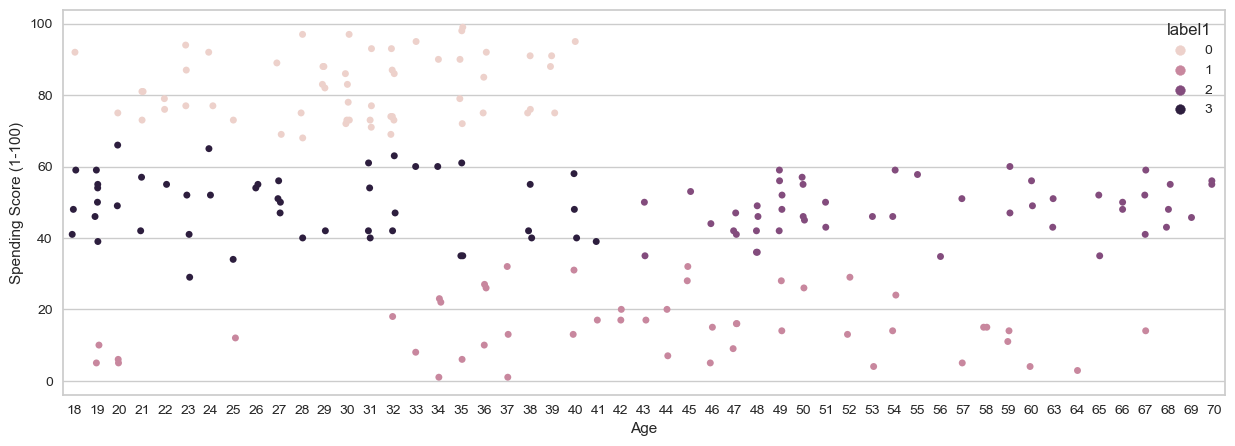

In [39]:
# 군집 분포 확인 

plt.figure(1, figsize = (15,5))
sns.stripplot(x = 'Age', y = 'Spending Score (1-100)', data = df, hue = 'label1')

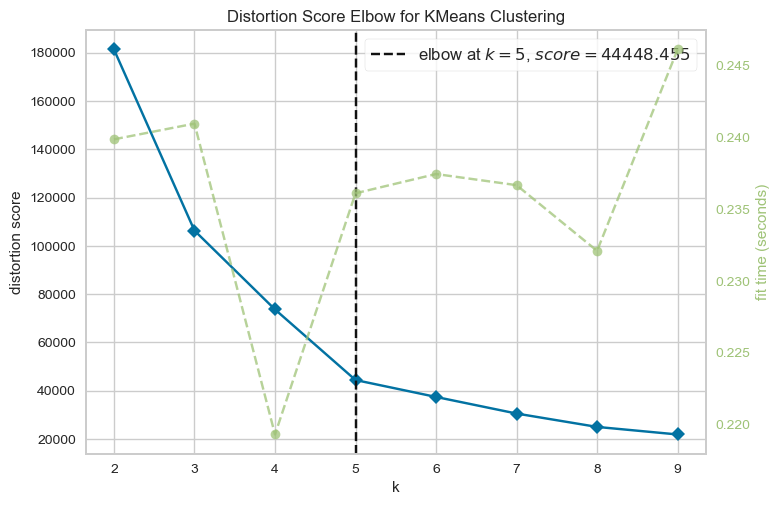

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
# 연소득과 쇼핑점수 로 군집화 

data2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values

visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(data2)
visualizer.show()

In [42]:
b = KMeans(n_clusters = 5) # 그룹 5개로 지정 클러스터 모델구축
b.fit(data2)
df['label2'] = b.labels_
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label1,label2
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,1,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

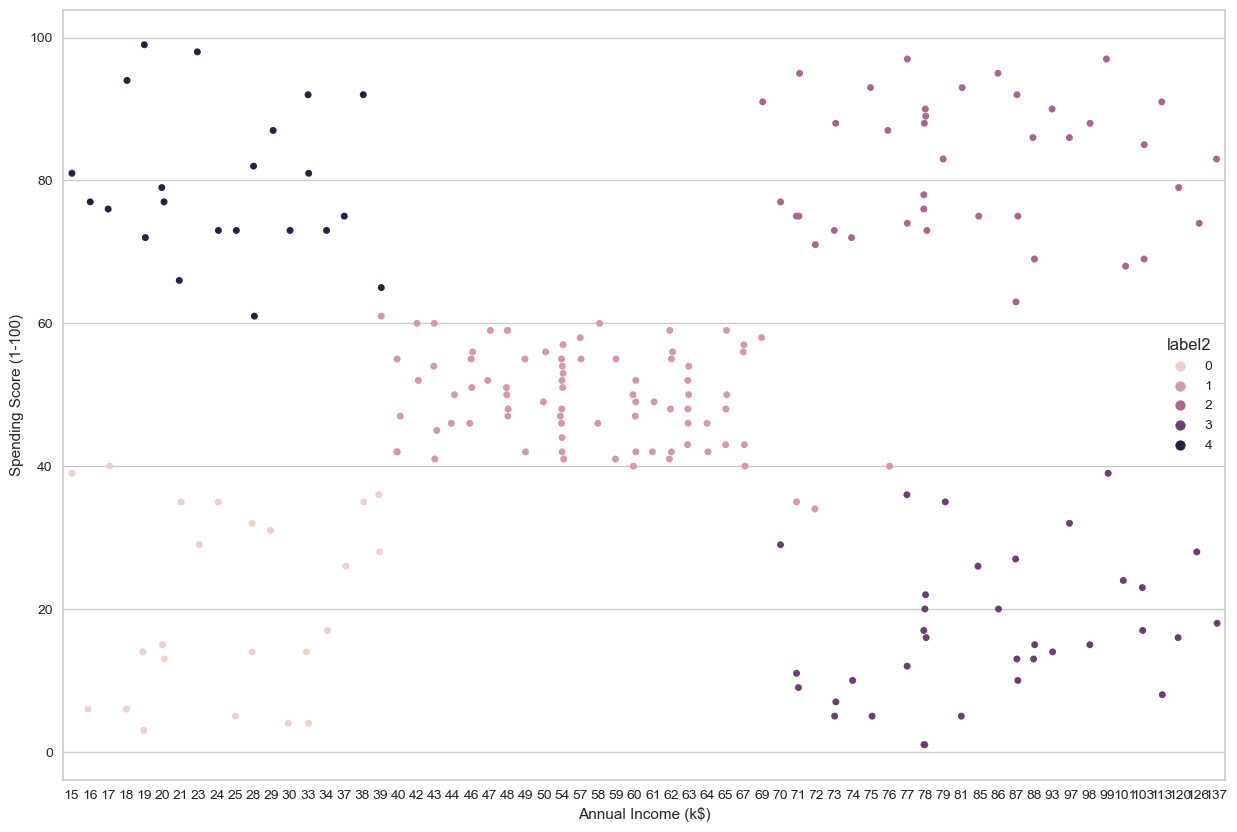

In [43]:
plt.figure(1, figsize = (15,10))
sns.stripplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, hue = 'label2')